# Goodwin's oscillator toy model

This example shows how the Goodwin's Oscillator toy model can be used.

Our version of this model has five parameters and three oscillating states as described in [1].

[1] Estimating Bayes factors via thermodynamic integration and population MCMC. Ben Calderhead and Mark Girolami, 2009, Computational Statistics and Data Analysis.

In [1]:
import pints
import pints.toy
import pints.plot
import matplotlib.pyplot as plt
import numpy as np
import time

model = pints.toy.GoodwinOscillatorModel()

C:\Users\plagl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\plagl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\plagl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\plagl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

We can get an example set of parameters using the `suggested_parameters()` method:

In [2]:
real_parameters = model.suggested_parameters()
print(real_parameters)

[2.   4.   0.12 0.08 0.1 ]


In the same way, we can get a suggested set of sampling times:

In [3]:
times = model.suggested_times()

Now we can run a simulation:

In [4]:
values = model.simulate(real_parameters, times)

This gives us all we need to create a plot of current versus time:

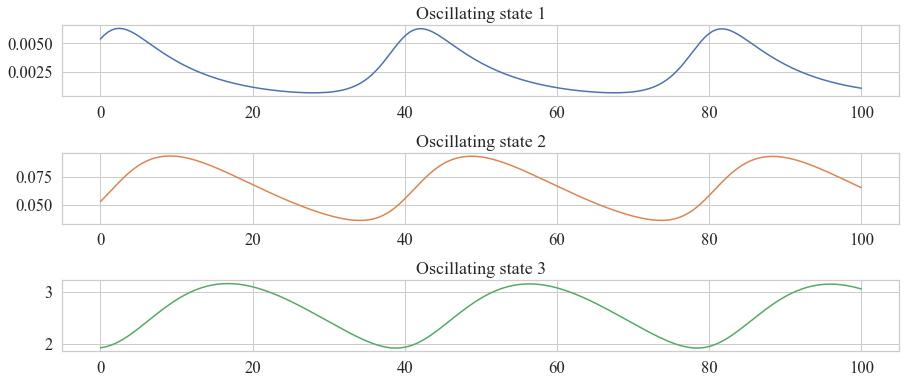

In [5]:
import seaborn as sns
import itertools
sns.set(context='notebook', style='whitegrid', palette="deep", font='Times New Roman', 
        font_scale=1.5, color_codes=True, rc={"grid.linewidth": 1})
palette = itertools.cycle(sns.color_palette())

plt.figure(figsize=(15,6))
plt.subplot(3, 1, 1)
plt.plot(times, values[:, 0], c=next(palette))
plt.title('Oscillating state 1')
plt.subplot(3, 1, 2)
plt.plot(times, values[:, 1], c=next(palette))
plt.title('Oscillating state 2')
plt.subplot(3, 1, 3)
plt.plot(times, values[:, 2], c=next(palette))
plt.subplots_adjust(wspace=0, hspace=0.8)
plt.title('Oscillating state 3')
plt.show()

Now we will add some noise to generate some fake "experimental" data and try to recover the original parameters.

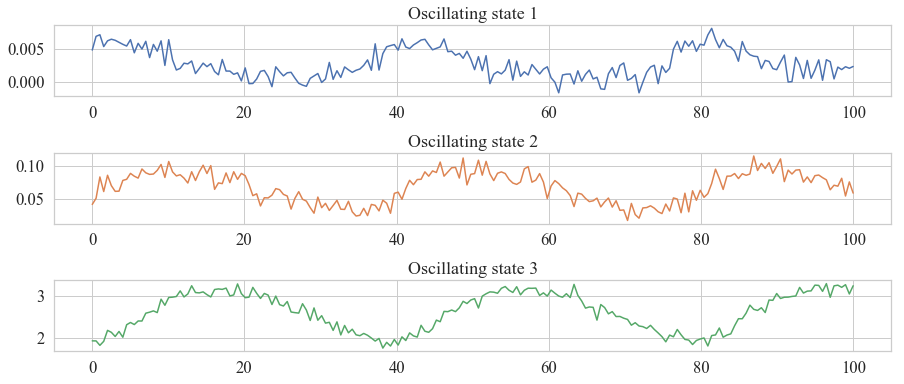

In [6]:
sns.set(context='notebook', style='whitegrid', palette="deep", font='Times New Roman', 
        font_scale=1.5, color_codes=True, rc={"grid.linewidth": 1})
palette = itertools.cycle(sns.color_palette())

noise1 = 0.001
noise2 = 0.01
noise3 = 0.1
noisy_values = np.array(values, copy=True)
noisy_values[:, 0] += np.random.normal(0, noise1, len(times))
noisy_values[:, 1] += np.random.normal(0, noise2, len(times))
noisy_values[:, 2] += np.random.normal(0, noise3, len(times))

plt.figure(figsize=(15,6))
plt.subplot(3, 1, 1)
plt.plot(times, noisy_values[:, 0], c=next(palette))
plt.title('Oscillating state 1')
plt.subplot(3, 1, 2)
plt.plot(times, noisy_values[:, 1], c=next(palette))
plt.title('Oscillating state 2')
plt.subplot(3, 1, 3)
plt.plot(times, noisy_values[:, 2], c=next(palette))
plt.subplots_adjust(wspace=0, hspace=0.8)
plt.title('Oscillating state 3')
plt.show()

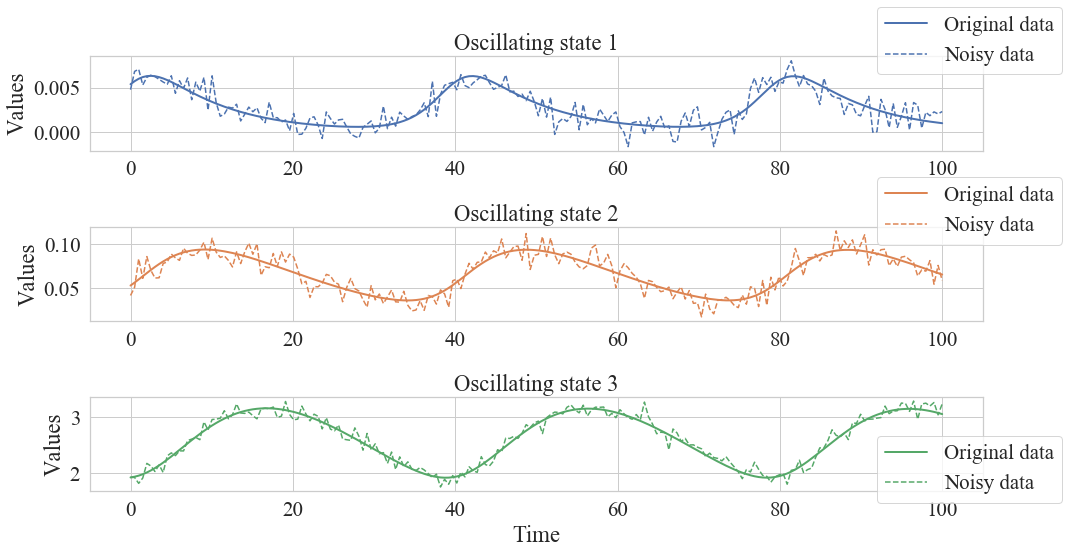

In [7]:
sns.set(context='notebook', style='whitegrid', palette="deep", font='Times New Roman', 
        font_scale=1.9, color_codes=True, rc={"grid.linewidth": 1})
palette = itertools.cycle(sns.color_palette())

fig = plt.figure(figsize=(16,8))
ax = plt.subplot(3, 1, 1)
c=next(palette)
plt.plot(times, values[:, 0], lw=2, c=c, label='Original data')
plt.plot(times, noisy_values[:, 0], '--', c=c, label='Noisy data')
plt.title('Oscillating state 1')
plt.ylabel('Values')
ax.legend(bbox_to_anchor=(0.87, 0.7))

ax = plt.subplot(3, 1, 2)
c=next(palette)
plt.plot(times, values[:, 1], lw=2, c=c, label='Original data')
plt.plot(times, noisy_values[:, 1], '--', c=c, label='Noisy data')
plt.title('Oscillating state 2')
plt.ylabel('Values')
ax.legend(bbox_to_anchor=(0.87, 0.7))

ax = plt.subplot(3, 1, 3)
c=next(palette)
plt.plot(times, values[:, 2], lw=2, c=c, label='Original data')
plt.plot(times, noisy_values[:, 2], '--', c=c, label='Noisy data')
plt.subplots_adjust(wspace=0, hspace=0.8)
plt.title('Oscillating state 3')
plt.ylabel('Values')
plt.xlabel('Time')
ax.legend(bbox_to_anchor=(0.87, 0.7))
plt.show()
fig.savefig("figures/goodwin.png", bbox_inches='tight', dpi=200)

Now we can try and infer the original parameters:

In [ ]:
# Create an object with links to the model and time series
problem = pints.MultiOutputProblem(model, times, values)

# Create a log posterior
bounds = pints.RectangularBoundaries([1, 1, 0.01, 0.01, 0.01], [10, 10, 1, 1, 1])
#bounds = [1, 1, 0.01, 0.01, 0.01], [10, 10, 1, 1, 1]
log_prior = pints.UniformLogPrior(bounds)
log_likelihood = pints.GaussianKnownSigmaLogLikelihood(problem, [noise1, noise2, noise3])
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Run MCMC on the noisy data
x0 = [[5, 5, 0.5, 0.5, 0.5]]*3
mcmc = pints.MCMCController(log_posterior, 3, x0)
mcmc.set_max_iterations(10000)
mcmc.set_log_to_screen(False)

start = time.time()

print('Running')
chains = mcmc.run()
print('Done!')

end = time.time()
diff = end - start

Running


Print results.

In [9]:
results = pints.MCMCSummary(chains=chains, time=diff,
                            parameter_names=["k2", "k3", "m1", "m2", "m3"])
print(results)

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess    ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  -----  --------------
k2       2.40    0.85    1.91    1.99   2.05   2.51   5.54     1.25    17.45  0.19
k3       3.98    0.58    2.85    3.81   3.98   4.14   5.53     1.08    25.51  0.28
m1       0.15    0.15    0.05    0.12   0.12   0.12   0.92     1.15    28.95  0.32
m2       0.09    0.04    0.02    0.08   0.08   0.09   0.21     1.15    93.28  1.03
m3       0.10    0.02    0.07    0.09   0.10   0.10   0.15     1.04    44.88  0.50


Now we can inspect the resulting chains:

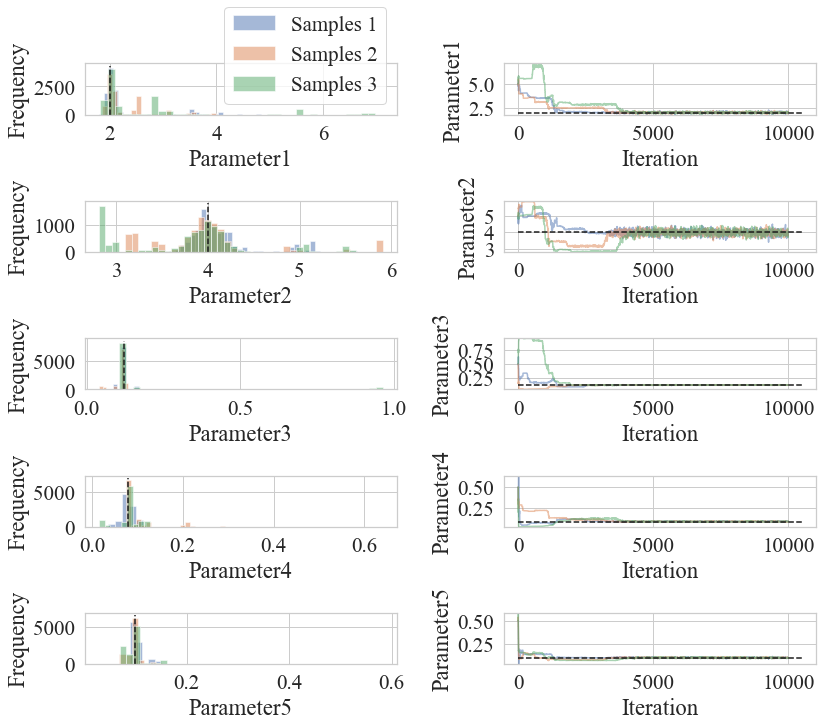

In [10]:
pints.plot.trace(chains, ref_parameters=real_parameters)
plt.show()

This is a pretty hard problem!

Plot posterior predictive distribution.

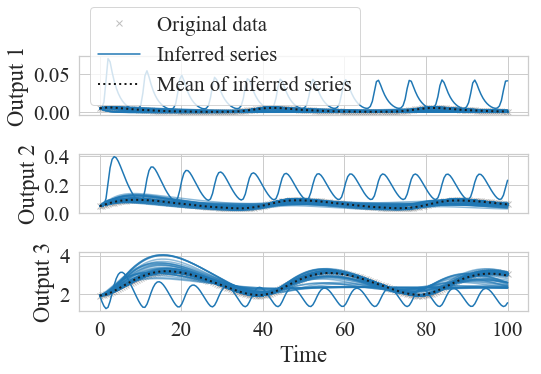

In [11]:
pints.plot.series(np.vstack(chains), problem)
plt.show()

In [12]:
input_parameters = log_prior.sample(2000)
likelihoods = np.apply_along_axis(log_likelihood, 1, input_parameters)
likelihoods[:5]

array([-131636.41814284,  -26948.45276745,  -32344.70723787,
       -238359.50276869,   -7818.9579237 ])

In [13]:
input_parameters[:5]

array([[5.40612645, 6.10285842, 0.38363977, 0.7247215 , 0.72872433],
       [5.9135138 , 9.33705985, 0.8630812 , 0.55760319, 0.6291745 ],
       [7.98040126, 6.24076782, 0.58620836, 0.38412954, 0.59112978],
       [7.55020915, 4.99101481, 0.47210449, 0.84536162, 0.91674231],
       [9.69588825, 4.51726505, 0.46242654, 0.57348658, 0.22199777]])

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(input_parameters, likelihoods, test_size=0.3, random_state=0)
emu = pints.MultiLayerNN(problem, X_train, y_train, input_scaler=MinMaxScaler(), output_scaler=StandardScaler())
emu.set_parameters(layers=6, neurons=128, hidden_activation='tanh', activation='linear', learning_rate=0.0001)
hist = emu.fit(epochs=500, batch_size=32, X_val=X_valid, y_val=y_valid, verbose=0)
emu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 329,729
Trainable params: 329,729
Non-trainable params: 0
_________________________________________________________________


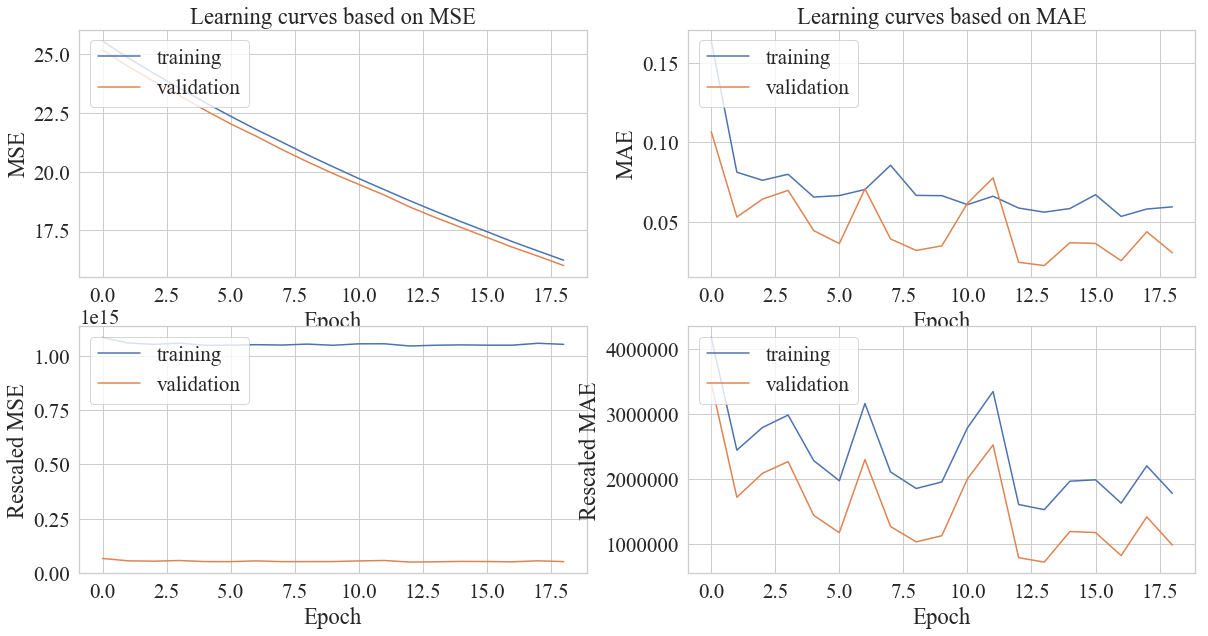

In [15]:
# summarize history for loss
#print(hist.history.keys())
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10))                 
ax1.title.set_text('Learning curves based on MSE')
ax2.title.set_text('Learning curves based on MAE')

ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax1.set_ylabel('MSE')
ax1.set_xlabel('Epoch')
ax1.legend(['training', 'validation'], loc='upper left')

ax2.plot(hist.history['mean_absolute_error'])
ax2.plot(hist.history['val_mean_absolute_error'])
ax2.set_ylabel('MAE')
ax2.set_xlabel('Epoch')
ax2.legend(['training', 'validation'], loc='upper left')

ax3.plot(hist.history['rescaled_mse'])
ax3.plot(hist.history['val_rescaled_mse'])
ax3.set_ylabel('Rescaled MSE')
ax3.set_xlabel('Epoch')
ax3.legend(['training', 'validation'], loc='upper left')

ax4.plot(hist.history['rescaled_mae'])
ax4.plot(hist.history['val_rescaled_mae'])
ax4.set_ylabel('Rescaled MAE')
ax4.set_xlabel('Epoch')
ax4.legend(['training', 'validation'], loc='upper left')

plt.show()
#fig.savefig("figures/training-best-nn-6-64.png", bbox_inches='tight', dpi=600)

In [16]:
test_data = log_prior.sample(2000)
model_prediction = np.apply_along_axis(log_likelihood, 1, test_data)
emu_prediction = np.apply_along_axis(emu, 1, test_data)

mape = np.mean(np.abs((model_prediction - emu_prediction) / model_prediction))
mape

40.46667665103133

In [17]:
log_posterior_emu = pints.LogPosterior(emu, log_prior)

In [18]:
# Run MCMC on the noisy data
x0 = [[5, 5, 0.5, 0.5, 0.5]]*3
mcmc = pints.MCMCController(log_posterior_emu, 3, x0)
mcmc.set_max_iterations(10000)
#mcmc.set_log_to_screen(False)

start = time.time()

print('Running')
chains_emu = mcmc.run()
print('Done!')

end = time.time()
diff = end - start

Running
Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0.5       0          0:00.0
2     9      0.333     0.333     0          0:00.0
3     12     0.25      0.5       0          0:00.0
20    63     0.381     0.286     0.19       0:00.0
40    123    0.341     0.22      0.195122   0:00.1
60    183    0.328     0.147541  0.23       0:00.1
80    243    0.296     0.136     0.235      0:00.2
100   303    0.248     0.158     0.198      0:00.2
120   363    0.214876  0.165     0.19       0:00.2
140   423    0.184     0.163     0.177305   0:00.3
160   483    0.173913  0.168     0.155      0:00.3
180   543    0.177     0.166     0.138      0:00.3
Initial phase completed.
200   603    0.164     0.149     0.129      0:00.4
220   663    0.149     0.145     0.118      0:00.4
240   723    0.149     0.141     0.120332   0:00.4
260 

3160  9483   0.305     0.299     0.298007   0:06.9
3180  9543   0.305     0.3       0.302      0:06.9
3200  9603   0.305     0.299     0.304      0:07.0
3220  9663   0.303     0.3       0.308      0:07.0
3240  9723   0.303     0.3       0.313      0:07.1
3260  9783   0.302     0.298988  0.316      0:07.2
3280  9843   0.302     0.298     0.32       0:07.2
3300  9903   0.301     0.297     0.322      0:07.3
3320  9963   0.3       0.297     0.326      0:07.3
3340  10023  0.3       0.297     0.329      0:07.4
3360  10083  0.299     0.297     0.333      0:07.4
3380  10143  0.299     0.297     0.336      0:07.5
3400  10203  0.299     0.297     0.339606   0:07.5
3420  10263  0.299     0.296     0.343      0:07.6
3440  10323  0.298     0.296     0.345      0:07.6
3460  10383  0.297024  0.296     0.346      0:07.7
3480  10443  0.296     0.295892  0.35       0:07.7
3500  10503  0.295     0.296     0.352      0:07.7
3520  10563  0.294     0.295     0.354      0:07.8
3540  10623  0.294     0.294832

6460  19383  0.255     0.261879  0.278      0:14.5
6480  19443  0.254     0.261     0.277      0:14.5
6500  19503  0.25473   0.261     0.276      0:14.6
6520  19563  0.254     0.262     0.276      0:14.6
6540  19623  0.255     0.261     0.276      0:14.7
6560  19683  0.255     0.261     0.276      0:14.7
6580  19743  0.255     0.261     0.275794   0:14.7
6600  19803  0.255     0.261     0.276      0:14.8
6620  19863  0.255     0.261     0.276      0:14.8
6640  19923  0.255     0.261     0.276      0:14.9
6660  19983  0.254     0.261     0.276      0:14.9
6680  20043  0.254     0.261     0.276      0:15.0
6700  20103  0.254     0.261752  0.276      0:15.0
6720  20163  0.253     0.261     0.276      0:15.1
6740  20223  0.253     0.262     0.277      0:15.1
6760  20283  0.252     0.262     0.276      0:15.2
6780  20343  0.252     0.262     0.276      0:15.2
6800  20403  0.251     0.261     0.276      0:15.2
6820  20463  0.251     0.260519  0.276499   0:15.3
6840  20523  0.251     0.26    

9740  29223  0.249769  0.249     0.281      0:21.9
9760  29283  0.249     0.249     0.281      0:21.9
9780  29343  0.249361  0.25      0.281      0:22.0
9800  29403  0.249     0.25      0.281      0:22.0
9820  29463  0.249     0.25      0.281      0:22.0
9840  29523  0.249     0.25      0.281      0:22.1
9860  29583  0.249     0.249569  0.281006   0:22.1
9880  29643  0.248     0.25      0.281      0:22.2
9900  29703  0.248     0.25      0.281      0:22.2
9920  29763  0.248     0.25      0.281      0:22.3
9940  29823  0.247963  0.25      0.28       0:22.3
9960  29883  0.248     0.25      0.281      0:22.4
9980  29943  0.248     0.25      0.281      0:22.4
10000 30000  0.2477    0.2495    0.2808     0:22.5
Halting: Maximum number of iterations (10000) reached.
Done!


In [19]:
results = pints.MCMCSummary(chains=chains_emu, time=diff,
                            parameter_names=["k2", "k3", "m1", "m2", "m3"])
print(results)

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess     ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  ------  --------------
k2       8.18    1.43    6.53    6.53   8.06   10.00  10.00    7.99    314.38  14.00
k3       1.99    1.13    1.00    1.00   1.37   3.52   3.52     5.33    236.12  10.51
m1       0.31    0.07    0.24    0.24   0.30   0.39   0.39     2.42    206.01  9.17
m2       0.25    0.03    0.21    0.21   0.26   0.28   0.28     2.18    498.82  22.21
m3       0.05    0.06    0.01    0.01   0.01   0.11   0.11     1.69    240.18  10.69


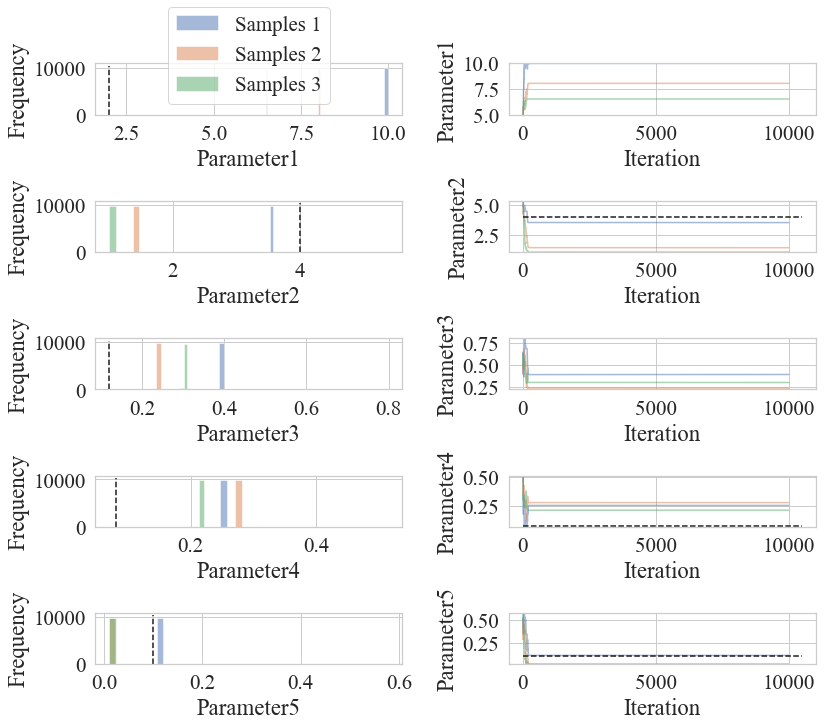

In [20]:
pints.plot.trace(chains_emu, ref_parameters=real_parameters)
plt.show()

## Metropolis Random Walk MCMC

In [21]:
# Run MCMC on the noisy data
x0 = [[5, 5, 0.5, 0.5, 0.5]]*3
sigma0 = np.array(real_parameters) * 5e-05
mcmc = pints.MCMCController(log_posterior, 3, x0, sigma0=sigma0, method=pints.MetropolisRandomWalkMCMC)
mcmc.set_max_iterations(10000)
#mcmc.set_log_to_screen(False)

start = time.time()

print('Running')
metropolis_chains = mcmc.run()
print('Done!')

end = time.time()
diff = end - start

Running
Using Metropolis random walk MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0.5       0          0:00.1
2     9      0.333     0.333     0.333      0:00.1
3     12     0.5       0.25      0.5        0:00.2
20    63     0.571     0.571     0.429      0:00.8
40    123    0.537     0.61      0.463      0:01.5
60    183    0.459     0.59      0.459      0:02.2
80    243    0.494     0.605     0.481      0:02.9
100   303    0.515     0.604     0.525      0:03.6
120   363    0.521     0.595     0.545      0:04.3
140   423    0.518     0.589     0.532      0:05.0
160   483    0.528     0.584     0.528      0:05.6
180   543    0.508     0.586     0.514      0:06.3
200   603    0.493     0.587     0.512      0:06.9
220   663    0.489     0.584     0.520362   0:07.5
240   723    0.477     0.573     0.531      0:08.1
260   783    0.471     0.571     0.521    

3100  9303   0.31      0.364     0.305      0:50.8
3120  9363   0.308     0.363     0.303      0:51.0
3140  9423   0.306     0.362     0.303      0:51.3
3160  9483   0.305     0.360329  0.302      0:51.4
3180  9543   0.305     0.359321  0.301      0:51.7
3200  9603   0.304     0.358     0.299      0:51.9
3220  9663   0.302     0.357     0.298      0:52.0
3240  9723   0.301     0.357     0.296      0:52.3
3260  9783   0.299     0.355     0.294      0:52.5
3280  9843   0.298     0.354     0.294      0:52.7
3300  9903   0.296     0.352     0.293      0:52.9
3320  9963   0.295     0.351     0.292      0:53.1
3340  10023  0.295     0.351     0.291      0:53.3
3360  10083  0.294     0.35      0.29       0:53.6
3380  10143  0.292517  0.349     0.288      0:53.8
3400  10203  0.291     0.349309  0.287      0:54.0
3420  10263  0.291     0.348     0.285      0:54.2
3440  10323  0.290032  0.347     0.284      0:54.4
3460  10383  0.289     0.345     0.283      0:54.6
3480  10443  0.288     0.344154

6320  18963  0.204     0.270685  0.206      1:25.6
6340  19023  0.204     0.271     0.205      1:25.8
6360  19083  0.204     0.271     0.205      1:26.0
6380  19143  0.204     0.271     0.204      1:26.3
6400  19203  0.203     0.271     0.204      1:26.5
6420  19263  0.203     0.271     0.204      1:26.8
6440  19323  0.202453  0.271     0.205      1:27.0
6460  19383  0.202     0.271     0.205      1:27.3
6480  19443  0.202     0.27      0.204      1:27.5
6500  19503  0.202     0.27      0.204      1:27.7
6520  19563  0.202     0.269     0.205      1:27.9
6540  19623  0.201     0.269072  0.205      1:28.2
6560  19683  0.201     0.268709  0.204      1:28.4
6580  19743  0.201     0.268     0.205      1:28.6
6600  19803  0.201     0.268     0.204363   1:28.8
6620  19863  0.2       0.268     0.204      1:29.0
6640  19923  0.2       0.268     0.204      1:29.2
6660  19983  0.2       0.268     0.204      1:29.5
6680  20043  0.199     0.268     0.204      1:29.8
6700  20103  0.199     0.267   

9540  28623  0.176     0.249     0.167      2:02.2
9560  28683  0.176     0.249     0.167      2:02.4
9580  28743  0.176     0.248     0.167      2:02.6
9600  28803  0.176     0.248     0.167      2:02.9
9620  28863  0.175     0.248     0.167      2:03.1
9640  28923  0.175     0.248     0.166      2:03.3
9660  28983  0.175     0.248318  0.166      2:03.5
9680  29043  0.174     0.248     0.165892   2:03.8
9700  29103  0.174     0.248     0.166      2:04.0
9720  29163  0.174     0.247814  0.166      2:04.2
9740  29223  0.173     0.248     0.165      2:04.4
9760  29283  0.173     0.248     0.165      2:04.6
9780  29343  0.173     0.248     0.165      2:04.8
9800  29403  0.173     0.247     0.165      2:05.0
9820  29463  0.173     0.247     0.165      2:05.3
9840  29523  0.172     0.247     0.164211   2:05.5
9860  29583  0.172     0.248     0.164      2:05.7
9880  29643  0.172     0.247     0.164      2:06.0
9900  29703  0.172     0.248     0.164      2:06.2
9920  29763  0.172     0.248   

In [22]:
metropolis_results = pints.MCMCSummary(chains=metropolis_chains, time=diff,
                            parameter_names=["k2", "k3", "m1", "m2", "m3"])
print(metropolis_results)

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess    ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  -----  --------------
k2       6.06    1.62    3.88    4.96   5.40   7.70   8.89     3.03    10.56  0.08
k3       6.43    2.66    2.32    4.30   6.15   9.97   10.00    2.86    12.45  0.10
m1       0.44    0.17    0.10    0.40   0.43   0.56   0.72     1.42    30.34  0.24
m2       0.13    0.11    0.02    0.03   0.15   0.18   0.46     1.16    26.98  0.21
m3       0.20    0.10    0.06    0.12   0.19   0.31   0.32     2.27    23.49  0.18


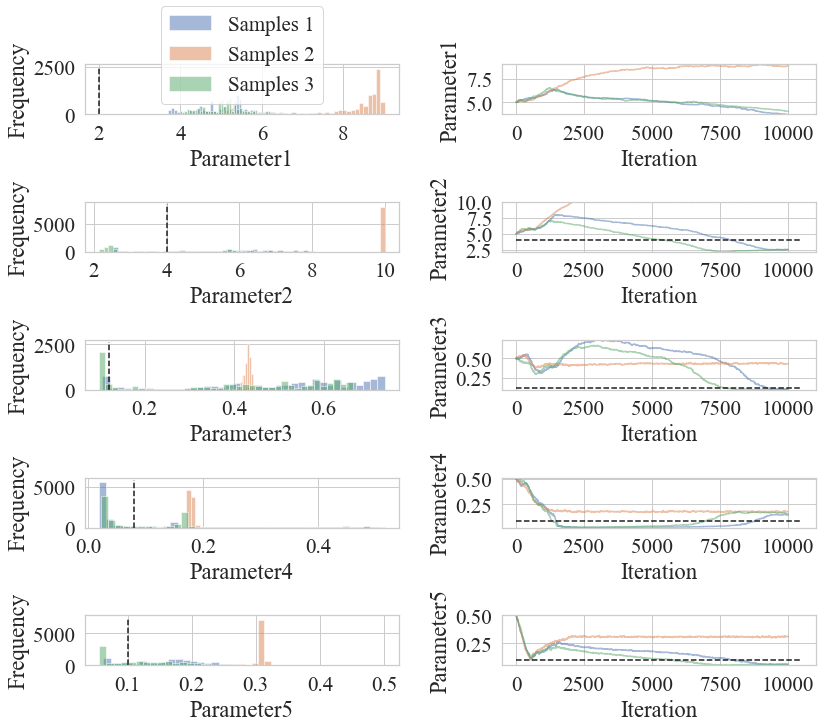

In [23]:
pints.plot.trace(metropolis_chains, ref_parameters=real_parameters)
plt.show()

In [24]:
# Run MCMC on the noisy data
x0 = [[5, 5, 0.5, 0.5, 0.5]]*3
sigma0 = np.array(real_parameters) * 5e-05
mcmc = pints.MCMCController(log_posterior_emu, 3, x0, sigma0=sigma0, method=pints.MetropolisRandomWalkMCMC)
mcmc.set_max_iterations(10000)
#mcmc.set_log_to_screen(False)

start = time.time()

print('Running')
chains_emu = mcmc.run()
print('Done!')

end = time.time()
diff = end - start

Running
Using Metropolis random walk MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0.5       0         0          0:00.0
2     9      0.333     0.333     0.333      0:00.0
3     12     0.25      0.25      0.5        0:00.0
20    63     0.476     0.571     0.429      0:00.1
40    123    0.463     0.512     0.439      0:00.1
60    183    0.508     0.525     0.459      0:00.1
80    243    0.494     0.519     0.481      0:00.2
100   303    0.465     0.525     0.475      0:00.2
120   363    0.463     0.512     0.446281   0:00.3
140   423    0.461     0.482     0.447      0:00.3
160   483    0.466     0.491     0.453      0:00.4
180   543    0.459     0.497     0.464      0:00.4
200   603    0.478     0.493     0.478      0:00.5
220   663    0.475     0.471     0.484      0:00.5
240   723    0.481     0.473029  0.49       0:00.5
260   783    0.475     0.471     0.479    

3180  9543   0.194     0.181     0.219      0:04.8
3200  9603   0.193     0.18      0.217      0:04.8
3220  9663   0.192     0.179     0.216      0:04.8
3240  9723   0.192     0.178     0.216      0:04.8
3260  9783   0.19      0.177     0.215      0:04.9
3280  9843   0.189     0.176     0.214      0:04.9
3300  9903   0.188     0.175     0.213      0:04.9
3320  9963   0.187     0.174044  0.212      0:04.9
3340  10023  0.186     0.173     0.210416   0:04.9
3360  10083  0.185064  0.172     0.209759   0:05.0
3380  10143  0.184     0.171     0.209      0:05.0
3400  10203  0.183     0.170244  0.208      0:05.0
3420  10263  0.182     0.17      0.206957   0:05.0
3440  10323  0.181052  0.169     0.206      0:05.0
3460  10383  0.18      0.168     0.205      0:05.1
3480  10443  0.179     0.167     0.204      0:05.1
3500  10503  0.178     0.166     0.203      0:05.1
3520  10563  0.177     0.165578  0.202      0:05.1
3540  10623  0.177     0.165     0.201      0:05.2
3560  10683  0.176     0.164   

6540  19623  0.109     0.0983    0.114      0:08.4
6560  19683  0.10852   0.098     0.114      0:08.4
6580  19743  0.108     0.0977    0.114      0:08.4
6600  19803  0.108     0.0974    0.113      0:08.5
6620  19863  0.108     0.0973    0.113      0:08.5
6640  19923  0.107     0.097     0.113      0:08.5
6660  19983  0.107041  0.0967    0.113      0:08.5
6680  20043  0.107     0.0964    0.112      0:08.6
6700  20103  0.107     0.0961    0.112      0:08.6
6720  20163  0.107     0.0958    0.112      0:08.6
6740  20223  0.106364  0.0958    0.112      0:08.6
6760  20283  0.106     0.0957    0.111      0:08.6
6780  20343  0.106     0.0954    0.111      0:08.7
6800  20403  0.105     0.0951    0.110572   0:08.7
6820  20463  0.105     0.0949    0.110541   0:08.7
6840  20523  0.105     0.0947    0.110364   0:08.7
6860  20583  0.105     0.0946    0.11       0:08.7
6880  20643  0.1042    0.0943    0.11       0:08.8
6900  20703  0.103898  0.094     0.11       0:08.8
6920  20763  0.104     0.0938  

9880  29643  0.0774    0.0713    0.0837     0:12.0
9900  29703  0.0775    0.0713    0.0835     0:12.0
9920  29763  0.0773    0.0713    0.0834     0:12.0
9940  29823  0.0772    0.0711    0.0833     0:12.0
9960  29883  0.077     0.071     0.0831     0:12.1
9980  29943  0.0768    0.0709    0.083      0:12.1
10000 30000  0.0767    0.071     0.0828     0:12.1
Halting: Maximum number of iterations (10000) reached.
Done!


In [25]:
results = pints.MCMCSummary(chains=chains_emu, time=diff,
                            parameter_names=["k2", "k3", "m1", "m2", "m3"])
print(results)

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess    ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  -----  --------------
k2       7.16    0.63    5.53    6.79   7.18   7.60   8.36     1.77    12.46  1.03
k3       1.24    0.77    1.00    1.00   1.00   1.01   4.28     1.06    34.61  2.86
m1       0.24    0.12    0.08    0.15   0.20   0.30   0.53     1.58    11.00  0.91
m2       0.35    0.06    0.27    0.30   0.34   0.38   0.47     1.59    14.38  1.19
m3       0.04    0.10    0.01    0.01   0.01   0.01   0.43     1.07    32.88  2.72


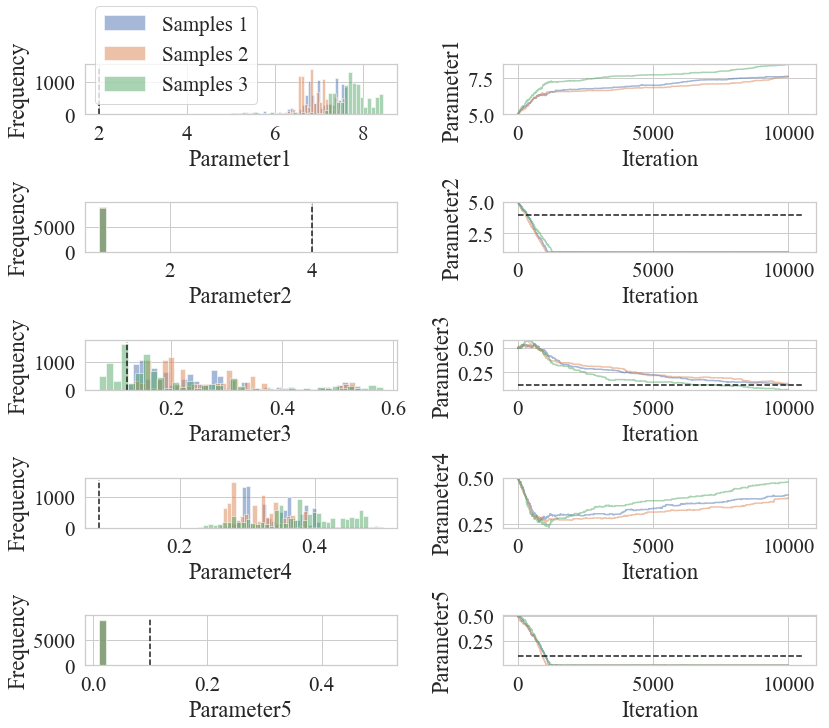

In [26]:
pints.plot.trace(chains_emu, ref_parameters=real_parameters)
plt.show()

Running...
Using Emulated Metropolis MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0.5       0         0          0:00.1
2     9      0.667     0         0          0:00.1
3     12     0.5       0         0          0:00.2
20    63     0.19      0         0.19       0:01.6
40    123    0.122     0         0.122      0:03.2
60    183    0.0984    0.0328    0.115      0:04.6
80    243    0.0864    0.0494    0.123      0:06.1
100   303    0.109     0.0396    0.109      0:07.4
120   363    0.116     0.0496    0.0992     0:08.9
140   423    0.106383  0.0567    0.0993     0:10.3
160   483    0.0994    0.0559    0.0994     0:11.7
180   543    0.0884    0.0497    0.0884     0:13.1
200   603    0.0846    0.0498    0.0896     0:14.5
220   663    0.0814    0.0498    0.0814     0:16.2
240   723    0.0788    0.0498    0.0747     0:17.7
260   783    0.0728    0.0575    0.069    

3100  9303   0.0293    0.0316    0.029      3:30.1
3120  9363   0.0292    0.0314    0.0292     3:31.3
3140  9423   0.029     0.0312    0.0293     3:32.7
3160  9483   0.0288    0.031     0.0291     3:33.8
3180  9543   0.0286    0.0308    0.0289     3:35.0
3200  9603   0.0284    0.0306    0.0287     3:36.3
3220  9663   0.0283    0.0307    0.0286     3:37.5
3240  9723   0.0284    0.0305    0.0284     3:38.7
3260  9783   0.0282    0.0304    0.0282     3:39.9
3280  9843   0.028     0.0302    0.0283     3:41.1
3300  9903   0.0279    0.0303    0.0282     3:42.3
3320  9963   0.0277    0.0301    0.028      3:43.7
3340  10023  0.0275    0.0299    0.0278     3:44.8
3360  10083  0.0274    0.0298    0.0277     3:46.0
3380  10143  0.0272    0.0296    0.0275     3:47.2
3400  10203  0.0271    0.0294    0.0273     3:48.5
3420  10263  0.0269    0.0295    0.0272     3:49.7
3440  10323  0.0267    0.0294    0.0273     3:51.0
3460  10383  0.0266    0.0292    0.0272     3:52.3
3480  10443  0.0264    0.029   

6320  18963  0.0182    0.0209    0.0193     6:35.5
6340  19023  0.0181    0.0208    0.0194     6:36.6
6360  19083  0.0181    0.0209    0.0193     6:38.1
6380  19143  0.018     0.021     0.0193     6:39.4
6400  19203  0.018     0.0211    0.0194     6:40.6
6420  19263  0.0179    0.021     0.0193     6:42.2
6440  19323  0.0179    0.021     0.0193     6:43.5
6460  19383  0.0178    0.0209    0.0192     6:44.8
6480  19443  0.0177    0.0208    0.0193     6:46.1
6500  19503  0.0177    0.0208    0.0192     6:47.1
6520  19563  0.0178    0.0207    0.0192     6:48.2
6540  19623  0.0177    0.0206    0.0191     6:49.2
6560  19683  0.0177    0.0206    0.0191     6:50.1
6580  19743  0.0176    0.0205    0.019      6:51.2
6600  19803  0.0176    0.0205    0.0189     6:52.0
6620  19863  0.0175    0.0204    0.0189     6:53.0
6640  19923  0.0175    0.0203    0.0188     6:53.9
6660  19983  0.0176    0.0203    0.0188     6:54.9
6680  20043  0.0175    0.0202    0.0189     6:55.8
6700  20103  0.0175    0.0201  

9540  28623  0.0141    0.0158    0.0145     9:01.1
9560  28683  0.0141    0.0158    0.0144     9:01.9
9580  28743  0.0141    0.0158    0.0144     9:02.7
9600  28803  0.0141    0.0157    0.0144     9:03.5
9620  28863  0.014     0.0157    0.0143     9:04.3
9640  28923  0.014     0.0157    0.0143     9:05.1
9660  28983  0.014     0.0156    0.0143     9:05.9
9680  29043  0.0139    0.0156    0.0143     9:06.7
9700  29103  0.0139    0.0156    0.0142     9:07.7
9720  29163  0.0139    0.0155    0.0143     9:08.5
9740  29223  0.0139    0.0156    0.0143     9:09.2
9760  29283  0.0138    0.0156    0.0142     9:09.9
9780  29343  0.0138    0.0155    0.0142     9:10.8
9800  29403  0.0138    0.0155    0.0142     9:11.6
9820  29463  0.0137    0.0155    0.0142     9:12.4
9840  29523  0.0137    0.0155    0.0141     9:13.2
9860  29583  0.0137    0.0155    0.0141     9:14.1
9880  29643  0.0137    0.0155    0.0141     9:14.9
9900  29703  0.0136    0.0155    0.014      9:15.7
9920  29763  0.0136    0.0154  

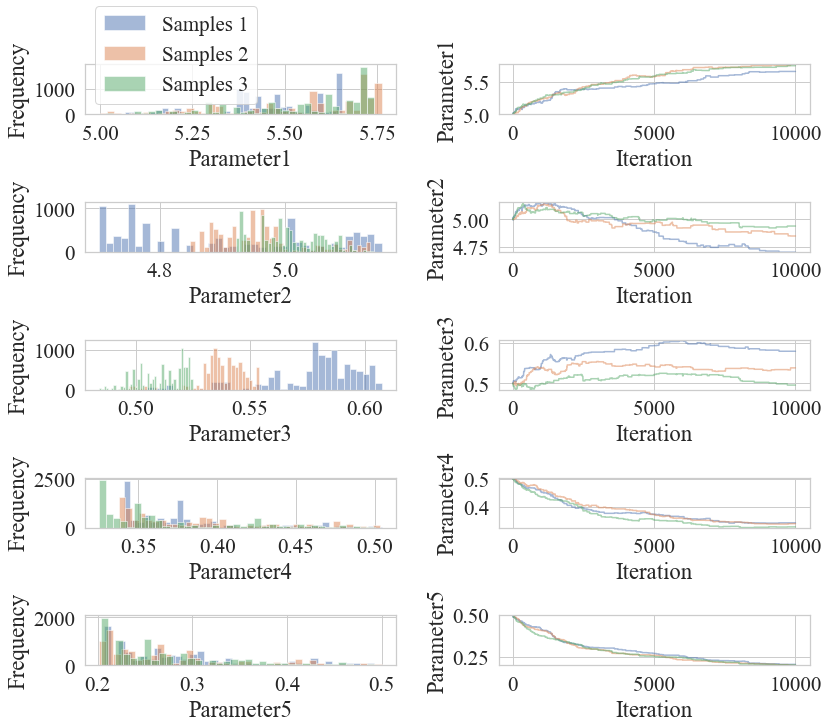

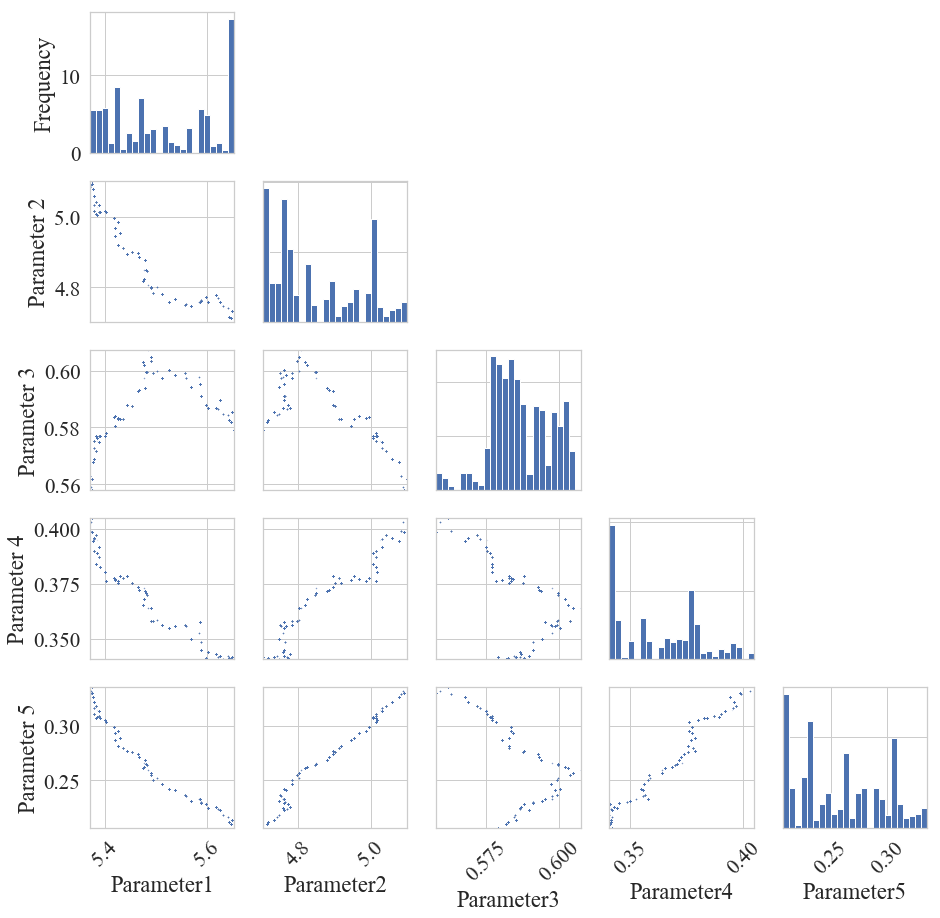

In [27]:
# Choose a covariance matrix for the proposal step
sigma0 = np.abs(real_parameters) * 5e-5

# Create mcmc routine
mcmc = pints.MCMCController(log_posterior_emu, 3, x0, sigma0=sigma0, method=pints.EmulatedMetropolisMCMC, f=log_posterior)

# Add stopping criterion
mcmc.set_max_iterations(10000)

# Disable logging mode
#mcmc.set_log_to_screen(False)

# Run!
print('Running...')
emulated_chains = mcmc.run()
print('Done!')

# Show traces and histograms
pints.plot.trace(emulated_chains)

# Discard warm up
emulated_chains_thinned = emulated_chains[:, 2000:, :]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(emulated_chains_thinned))

# Look at distribution in chain 0
pints.plot.pairwise(emulated_chains_thinned[0])

# Show graphs
plt.show()

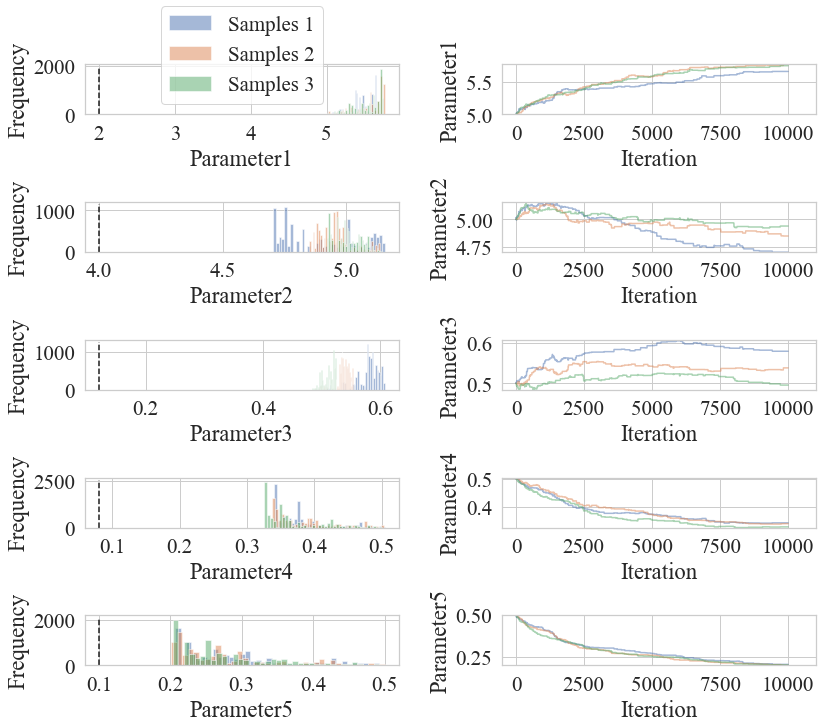

In [28]:
pints.plot.trace(emulated_chains, ref_parameters=real_parameters)
plt.show()

In [29]:
acceptance_rates = mcmc.acceptance_rates()
acceptance_rates

[(0.013499999999999974, 0.5031000000000008, 0.026833631484794274),
 (0.01529999999999998, 0.4911, 0.031154551007941355),
 (0.013899999999999961, 0.4945, 0.028109201213346816)]